In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
data = pd.read_csv('gbm-data.csv').values
y = data[:,0]
X = data[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [17]:
def losses(clf, X, y):
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))    
    losses = []    
    for iter_score in clf.staged_decision_function(X):        
        losses.append(log_loss(y, sigmoid(iter_score)))
    #for iter_proba in clf.staged_predict_proba(X_test):                
        #losses.append(log_loss(y_test, iter_proba))
    return losses

def gb(learning_rate=0.2, n_estimators=250, verbose=False):        
    clf = GradientBoostingClassifier(n_estimators=n_estimators, verbose=verbose, random_state=241, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    
    plt.plot(losses(clf, X_train, y_train), label='%.1f train' % learning_rate, linestyle='--')
    
    test_losses = losses(clf, X_test, y_test)
    plt.plot(test_losses, label='%.1f test' % learning_rate)   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    loss = log_loss(y_test, clf.predict_proba(X_test))
    print('Loss with learning rate %.2f: %f' % (learning_rate, loss))    
    return clf, np.min(test_losses), np.argmin(test_losses), loss

Loss with learning rate 1.00: 1.356749
Loss with learning rate 0.50: 1.006526
Loss with learning rate 0.30: 0.791029
Loss with learning rate 0.20: 0.659018
Loss with learning rate 0.10: 0.567281


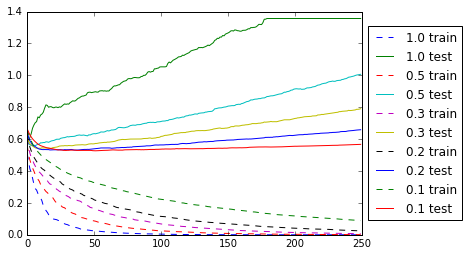

In [18]:
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    gb(lr)
    
with open('answer1.txt', 'w') as file:
    file.write('overfitting')

Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

Loss with learning rate 0.20: 0.659018
0.531450796319 36


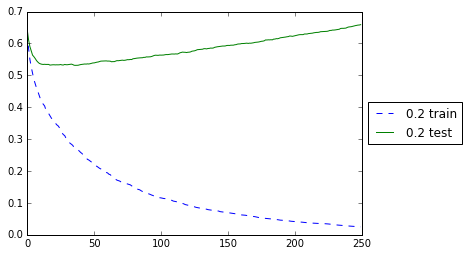

In [19]:
clf, min_loss, min_loss_iter, loss = gb(0.2)
print(min_loss, min_loss_iter)

with open('answer2.txt', 'w') as file:
    file.write('%.2f %d' % (min_loss, min_loss_iter))

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=min_loss_iter, random_state=241)
clf.fit(X_train, y_train)
rf_loss = log_loss(y_test, clf.predict_proba(X_test))
print(rf_loss)

with open('answer3.txt', 'w') as file:
    file.write('%.2f' % rf_loss)

0.54138128618
